In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

In [2]:
oo = pd.read_csv('olympics.csv', skiprows = 4)
print(oo.columns)

Index(['City', 'Edition', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal'],
      dtype='object')


In [30]:
owens = oo[oo.Athlete.str.contains('OWENS')]

In [31]:
columns = ['Athlete', 'Sport', 'Event', 'Medal']
print(owens[columns])

           Athlete      Sport         Event Medal
6427  OWENS, Jesse  Athletics          100m  Gold
6439  OWENS, Jesse  Athletics          200m  Gold
6456  OWENS, Jesse  Athletics  4x100m relay  Gold
6523  OWENS, Jesse  Athletics     long jump  Gold


In [42]:
bm_mens = oo[(oo.Sport.str.contains('Badminton')) & (oo.Event.str.contains('singles')) & (oo.Event_gender.str.contains('M')) & (oo.Medal.str.contains('Gold'))]
bm_mens_winners = bm_mens.sort_values(by = ['Athlete'])

In [43]:
print(bm_mens_winners)

            City  Edition      Sport Discipline                  Athlete  NOC  \
20045  Barcelona     1992  Badminton  Badminton        BUDI KUSUMA, Alan  INA   
25734     Athens     2004  Badminton  Badminton          HIDAYAT, Taufik  INA   
21787    Atlanta     1996  Badminton  Badminton  HOYER-LARSEN, Poul Erik  DEN   
23717     Sydney     2000  Badminton  Badminton              JI, Xinpeng  CHN   
27741    Beijing     2008  Badminton  Badminton                 LIN, Dan  CHN   

      Gender    Event Event_gender Medal  
20045    Men  singles            M  Gold  
25734    Men  singles            M  Gold  
21787    Men  singles            M  Gold  
23717    Men  singles            M  Gold  
27741    Men  singles            M  Gold  


In [36]:
recents = oo[(oo.Edition >= 1984) & (oo.Edition <= 2008)]
recents2 = recents.NOC.value_counts()
print(type(recents2))
recents3 = recents2[recents2 > 50]
print(recents3)
#recents3 = recents2[recents2]
#recents3.plot(kind = 'pie', figsize = (16,8), colormap = 'YlOrRd')

<class 'pandas.core.series.Series'>
USA    1837
AUS     762
GER     691
CHN     679
RUS     638
KOR     437
ITA     418
NED     407
FRA     400
GBR     390
ROU     355
JPN     347
BRA     306
CUB     305
ESP     298
URS     294
CAN     284
FRG     270
HUN     252
EUN     223
YUG     202
GDR     174
SWE     165
ARG     153
NOR     148
UKR     148
POL     140
DEN     132
BUL     114
NZL      95
BLR      92
JAM      84
NGR      82
CRO      79
GRE      69
SUI      67
KEN      56
Name: NOC, dtype: int64


<AxesSubplot:xlabel='Medal', ylabel='count'>

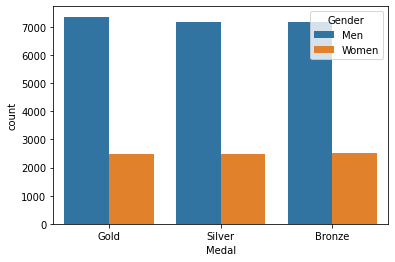

In [35]:
sns.countplot(x='Medal', data = oo, hue = 'Gender')

<AxesSubplot:xlabel='Medal', ylabel='count'>

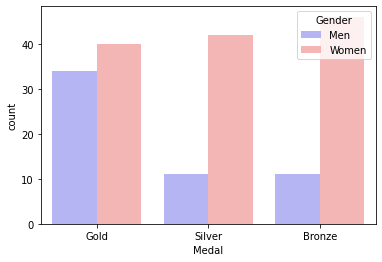

In [57]:
china = oo[(oo.NOC == 'CHN') & (oo.Edition == 2008)]
sns.countplot(x='Medal', data = china, hue = 'Gender', palette = 'bwr', order = ['Gold','Silver','Bronze'])
#china.Gender.value_counts().plot(kind = 'bar', colormap = 'bwr')


<AxesSubplot:>

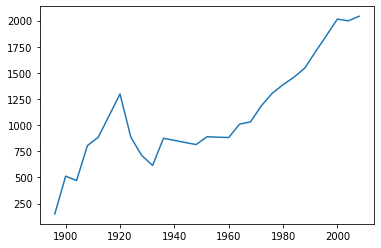

In [92]:
#year = oo.set_index('Edition')
#year.sort_index()
#medals = year.value_counts()
oo.Edition.value_counts().sort_index().plot()
#sns.displot(data = medals, hue = 'Medal', palette = 'bwr', order = ['Gold','Silver','Bronze'])

<AxesSubplot:xlabel='Edition'>

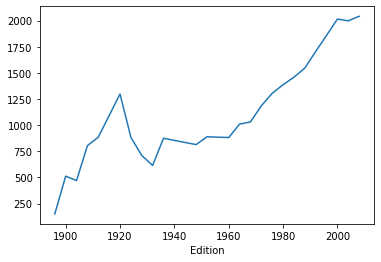

In [103]:
medals = oo.groupby('Edition').agg('count')
medals.Medal.plot()

In [108]:
oo.groupby('NOC').agg({'Edition':['min','max','count']})


Edition            
        min   max count
NOC                    
AFG    2008  2008     1
AHO    1988  1988     1
ALG    1984  2008    14
ANZ    1908  1912    29
ARG    1924  2008   239
..      ...   ...   ...
VIE    2000  2008     2
YUG    1924  2000   435
ZAM    1984  1996     2
ZIM    1980  2008    23
ZZX    1896  1904    48

[138 rows x 3 columns]

In [121]:
mw = oo[(oo.Edition == 2008) & ((oo.Event == '100m') | (oo.Event == '200m'))]
g = mw.groupby(['NOC','Gender','Discipline','Event']).size()


In [127]:
df = g.unstack(['Discipline','Event'])
df.stack('Event')

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

In [128]:
df.unstack('Gender')

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

<AxesSubplot:xlabel='Edition'>

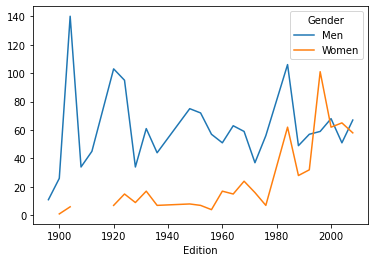

In [139]:
golds = oo[(oo.Medal == 'Gold') & (oo.NOC == 'USA')]
g = golds.groupby(['Edition','Gender']).size().unstack('Gender')
g.plot(kind = 'line')

<AxesSubplot:xlabel='Athlete'>

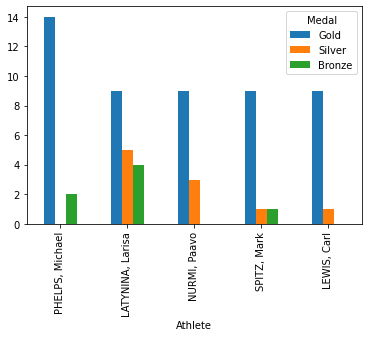

In [150]:
g = oo.groupby(['Athlete','Medal']).size().unstack('Medal', fill_value = 0)
g.sort_values(['Gold','Silver','Bronze'], ascending = False)[['Gold','Silver','Bronze']].head().plot(kind = 'bar')

In [157]:
bei = oo[oo.Edition == 2008]
countries = bei.groupby(['NOC','Medal']).size().unstack('Medal', fill_value = 0)

In [168]:
plot = countries.sort_values(['Gold','Silver','Bronze'], ascending = False)[['Gold','Silver','Bronze']]
plot = plot.transpose()


<AxesSubplot:xlabel='NOC', ylabel='Medal'>

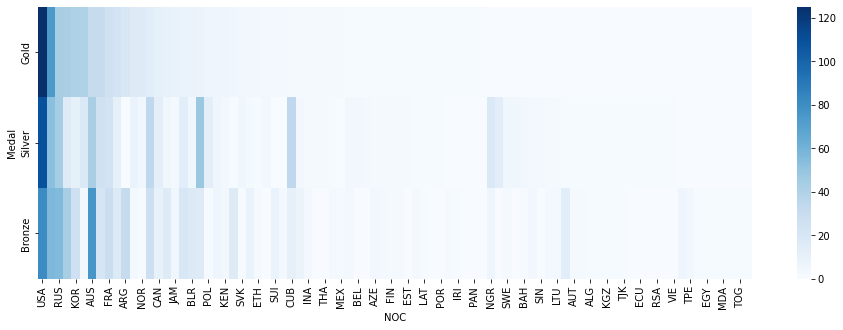

In [176]:
matplotlib.pyplot.figure(figsize = (16,5))
sns.heatmap(plot, cmap = 'Blues')

In [240]:
ath = oo[(oo.NOC == 'USA')]
#a = ath.groupby(['Athlete','Discipline','Medal']).size().unstack('Medal', fill_value = 0)
a = ath.groupby(['Edition', 'Athlete', 'Medal']).size().unstack('Medal', fill_value = 0)
a['Total'] = a['Gold'] + a['Silver'] + a['Bronze']
a.reset_index(inplace=True)

top = [group.sort_values('Total', ascending = False)[:1] for year, group in a.groupby('Edition')]
final = pd.DataFrame([])

for row in top:
    final = pd.concat([final, row])

print(final)

Medal  Edition                      Athlete  Bronze  Gold  Silver  Total
5         1896              GARRETT, Robert       0     2       2      4
14        1900               BAXTER, Irving       0     2       3      5
153       1904                 HEIDA, Anton       0     5       1      6
363       1908             SHERIDAN, Martin       1     2       0      3
421       1912        OSBURN, Carl Townsend       1     1       2      4
506       1920                  LEE, Willis       1     5       1      7
733       1924          WEISSMULLER, Johnny       1     3       0      4
800       1928       OSIPOWICH, Albina Lucy       0     2       0      2
859       1932           DIDRIKSON, Mildred       0     2       1      3
1028      1936                 OWENS, Jesse       0     4       0      4
1128      1948      MCLANE, James Price Jr.       0     2       1      3
1234      1952          KONNO, Ford Hiroshi       0     2       1      3
1379      1956        MORROW, Robert Joseph       0